In [471]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
import fdasrsf as fs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from fdasrsf.regression import elastic_regression

In [474]:
# def labeller(x):
#     if x=='Healthy':
#         return 0
#     else:
#         return 1

# y_labels = df_processor['Cohort'].apply(labeller)

In [475]:
# obj = elastic_regression(np.transpose(df_processor.iloc[:,0:400].values), y_labels.values, time)

In [476]:
# obj.calc_model()

In [26]:
from fdasrsf.utility_functions import elastic_distance

In [478]:
# obj.predict()

In [27]:
#plt.plot(ys[1])

In [59]:
import numpy as np

baseline_df = pd.read_csv('final_clinical_df.csv')
baseline_df = baseline_df.drop(columns=['Dom','Gender'])#.astype('float')

ys = np.load('all_curlsp.npy')#[:,:,1]
pids = np.loadtxt('pids_curlp.txt')
visits = np.loadtxt('visits_curlp.txt', dtype=str)


df_processor = pd.DataFrame(ys)
df_processor['pids']=pids
df_processor['visits']=visits

baseline_df['Normalized_Dynamometry (N/cm)'] = baseline_df['Avg. Dynamometry (N)'] / baseline_df['Forearm_Length (cm)']
baseline_df['Normalized Elbow Torque (Nm/cm)'] = baseline_df['Elbow Torque (Nm)'] / baseline_df['Forearm_Length (cm)']

df_processor['visits'] = pd.to_datetime(df_processor['visits'])
df_processor['visits'] = df_processor['visits'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_processor['visits'] = pd.to_datetime(df_processor['visits'], format = "%Y-%m-%d")

baseline_df['Sensor Data Date'] = pd.to_datetime(baseline_df['Sensor Data Date'], format = "%Y-%m-%d")
df_processor = pd.merge(df_processor, baseline_df, left_on=['pids','visits'], right_on=['PID','Sensor Data Date'], how='inner')

import pandas as pd
baseline_df = pd.read_excel('Combined_DATA_11.12.21.xlsx', engine='openpyxl')

pids_int = [int(p) for p in pids]
pid_dict = dict(zip(baseline_df['PID'], baseline_df['Cohort']))

cohorts = np.array([pid_dict[l] for l in pids_int])

#cohorts = np.loadtxt('cohorts.txt', dtype='str')
#muscle_scores = np.loadtxt('muscle_scores.txt')

/tmp/ipykernel_3514123/973822052.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processor['visits'] = pd.to_datetime(df_processor['visits'])


In [60]:
#baseline_numeric = baseline_df.select_dtypes(['number'])# or source.select_dtypes([np.number]


In [31]:
#baseline_numeric['Age']

In [32]:
#baseline_numeric.columns

In [33]:
#sns.boxplot(data=baseline_numeric, y='Brooke')

In [34]:
#sns.boxplot(data=baseline_numeric, y='Forearm_Length (cm)')

In [35]:
#sns.boxplot(data=baseline_numeric, y='Age')

In [36]:
#df_processor = pd.DataFrame(ys)

In [61]:
df_processor['pids']=pids
df_processor['visits']=visits
#df_processor['pids'] = df_processor['pids'].apply(lambda x: int(x.split('-')))

In [490]:
#df_processor = df_processor.groupby('pids').apply(lambda x: x.sample(1)).reset_index(drop=True)

In [491]:
# """ This is completely wrong, treat repeat visits correctly """
# df_processor = df_processor.groupby('pids').agg('mean').reset_index()

In [62]:
#df_processor = pd.merge(df_processor, baseline_df, left_on='pids', right_on='PID', how='inner')

In [39]:
#df_processor

In [40]:
#df_processor['peak_max']=df_processor.iloc[:,0:400].abs().max(axis=1)

In [41]:
#df_peak_max = df_processor[['peak_max', 'PID', 'Cohort']].groupby('PID').agg({'Cohort': 'first', 'peak_max': 'mean'})

In [42]:
#df_peak_max['Cohort']=pd.Categorical(df_peak_max['Cohort'])

In [429]:
# 4 - SMA
# 6 - SMA
# 42 - SMA

# 13 - DMD
# 29 - DMD
# 30 - DMD
# 31 - DMD
# 43 - DMD

# 44 - Control
# 45 - Control
# 7 - Control
# 23 - Control
# 34 - Control

# Removed
# 7, 20, 23, 34

In [43]:
#df_peak_max.sort_values(by='peak_max')

In [ ]:
# 36, 

In [63]:
from collections import Counter
#Counter(df_peak_max['Cohort'])

# 48
# 21 DMD
# 11 SMA
# 17 Healthy

In [45]:
# sns.set(font_scale=3)

# sns.set_style(style='white')

# a = sns.stripplot(data=df_peak_max, x='Cohort', y='peak_max', palette=my_pal)

# add_stat_annotation(a, data=df_peak_max, x='Cohort', y='peak_max', 
#                         box_pairs=[("DMD", "Healthy"), ("DMD", "SMA"), ("SMA", "Healthy")],
#                         test='t-test_ind', text_format='simple')
#axs[i].set_title(titles[i])
#plt.tight_layout()
#plt.savefig('boxplots_pca.png', dpi=300)


In [46]:
#df_processor['peak_max']=df_processor.iloc[:,0:400].max()

In [501]:
## Running horizontal and joint functional pca

In [56]:
ys.shape

(158, 400)

In [64]:
ys = df_processor.iloc[:,1:401].values
time = np.array(range(400)).astype(float)
obj = fs.fdawarp(np.transpose(ys), time)

""" Calculate healthy mean"""
obj.srsf_align(parallel=True)



Initializing...
Compute Karcher Mean of 70 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


In [49]:
#list(df_pca_analyze['vpc1'])

In [50]:
#list(df_pca_analyze['vpc1_thresh'])

<Figure size 3000x300 with 0 Axes>

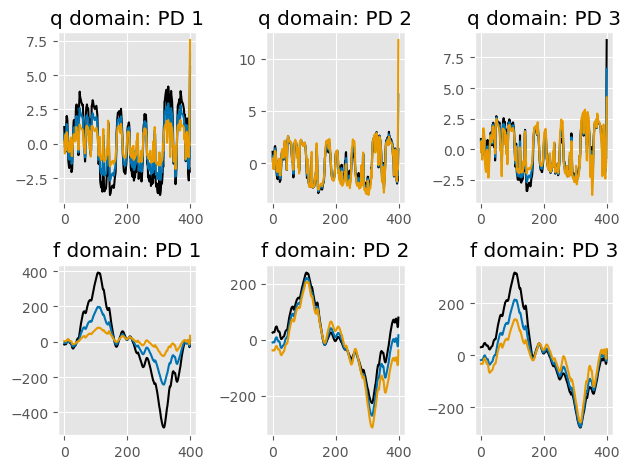

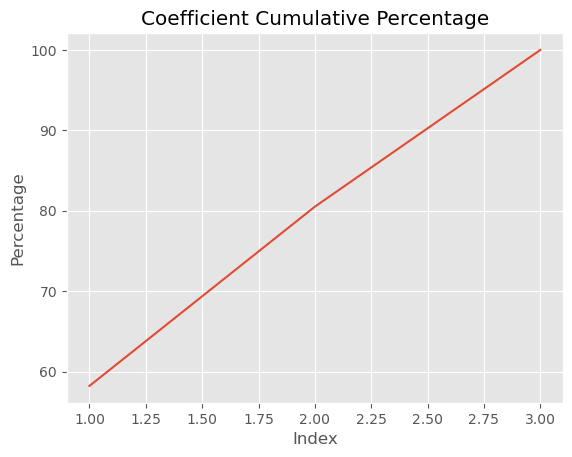

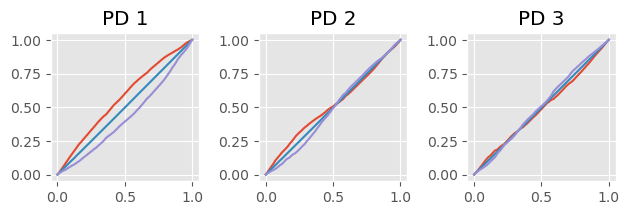

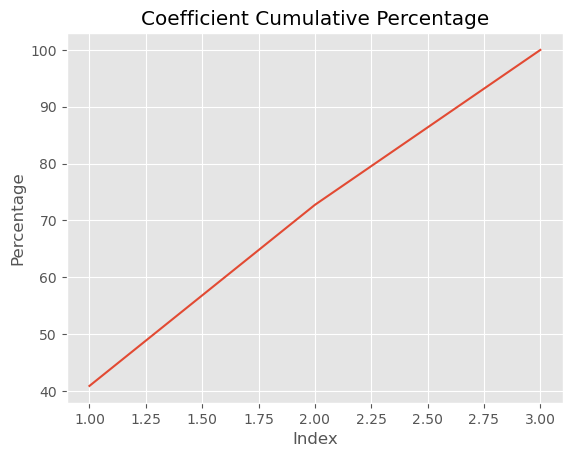

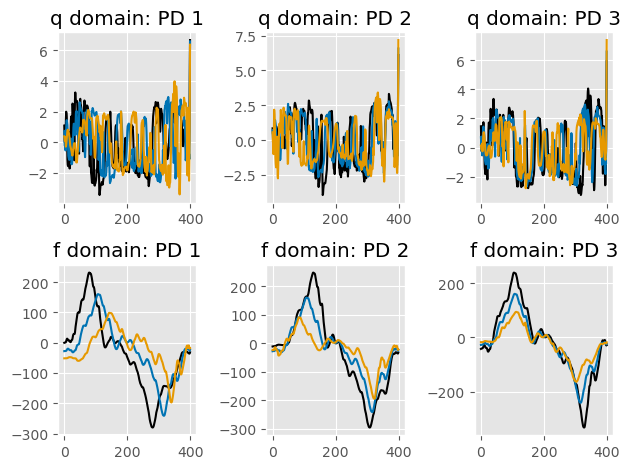

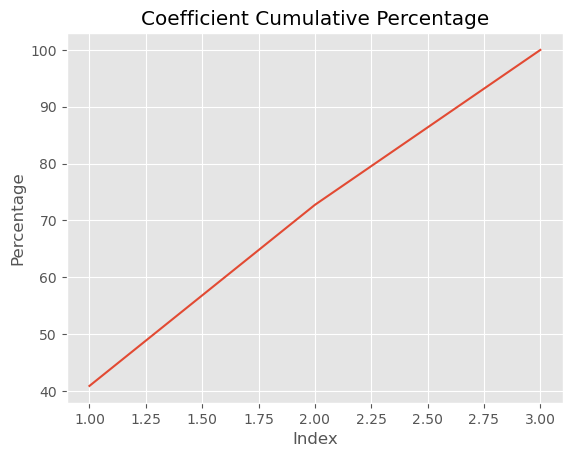

TypeError: agg function failed [how->mean,dtype->object]

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 3))
vpca = fs.fdavpca(obj)
vpca.calc_fpca(no=3)
vpca.plot()

vpca_df = pd.DataFrame(vpca.coef, columns=['vpc1', 'vpc2', 'vpc3'])

hpca = fs.fdahpca(obj)
hpca.calc_fpca(no=3)

hpca.plot()

hpca_df = pd.DataFrame(hpca.coef, columns=['hpc1', 'hpc2', 'hpc3'])

jpca = fs.fdajpca(obj)
jpca.calc_fpca(no=3)

jpca.plot()

jpca_df = pd.DataFrame(jpca.coef, columns=['jpc1', 'jpc2', 'jpc3'])

pca_df = pd.concat([hpca_df, vpca_df, jpca_df], axis=1)

pca_df

df_pca_analyze = pd.concat([df_processor.iloc[:,402:], pca_df], axis=1)


df_pca_analyze['vpc1_thresh']=np.clip(df_pca_analyze['vpc1'], a_min=-np.inf, a_max=0)
df_pca_analyze['vpc2_thresh']=np.clip(df_pca_analyze['vpc2'], a_min=0, a_max=np.inf)


import seaborn as sns



import matplotlib.pyplot as mp

import seaborn as sb

#plt.figure(figsize = (30,5))

corr = df_pca_analyze.groupby('PID').agg('mean').corr().iloc[16:,0:17]

dataplot = sb.heatmap(corr, cmap=sb.diverging_palette(0, 255, sep=77, as_cmap=True), annot=True, vmin=-1, vmax=1)
  
# displaying heatmap
mp.show()

In [52]:
#df_pca_analyze['vpc1'].max()

In [53]:
#df_pca_analyze['vpc2_thresh'].min()

In [54]:
#df_pca_analyze['vpc2']

In [55]:
# corr = df_pca_analyze.groupby('PID').agg('mean').corr().iloc[15:,0:17]

# plt.figure(figsize=(10, 5))
# dataplot = sb.heatmap(corr, cmap=sb.diverging_palette(0, 255, sep=77, as_cmap=True), annot=True, vmin=-1, vmax=1)
  
# # displaying heatmap

# mp.show()

In [ ]:
# import seaborn as sns
# plt.figure(figsize=(8, 8))
# sns.heatmap(pids_df[['hpc1', 'hpc2', 'hpc3', 'vpc1', 'vpc2', 'vpc3']].corr(), vmin=-1, vmax=1, annot=True)

In [541]:
pids_df['vpc2_thresh'].mean()

3.440302429700718

In [540]:
drop_pids = ['17.0', '10.0', '9.0', '5.0', '']
pids_df.sort_values(by='vpc2_thresh')[['PID', 'vpc2_thresh', 'cohort']]

,PID,vpc2_thresh,cohort
0,1.0,0.000000,DMD
17,21.0,0.000000,Healthy
16,19.0,0.000000,Healthy
29,40.0,0.000000,SMA
14,38.0,0.000000,DMD
12,36.0,0.000000,DMD
21,28.0,0.000000,Healthy
10,27.0,0.000000,DMD
18,22.0,0.000000,Healthy
9,18.0,0.000000,DMD


In [519]:
df_pca_analyze['vpc1']

0      6.698236
1      9.592482
2     -2.618737
3      1.308717
4     11.713449
        ...    
65   -12.689163
66    20.335280
67    20.335280
68     0.827636
69     0.827636
Name: vpc1, Length: 70, dtype: float64

NameError: name 'order' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

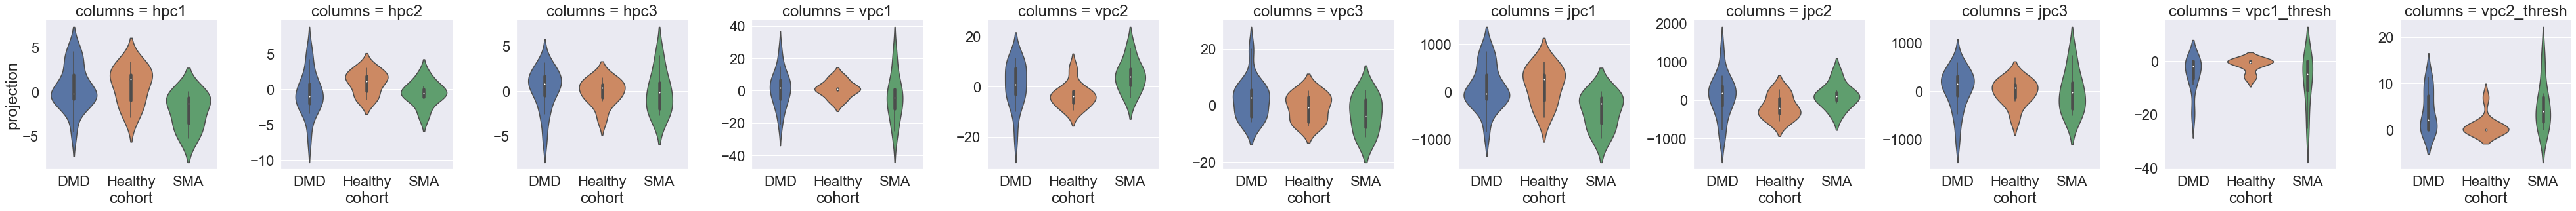

In [520]:
""" Boxplot of projection on each dimension """

pids_df = []

for c, df_c in df_pca_analyze.groupby('Cohort'):
    plt.figure()
    pid_df = df_c.groupby('PID').agg('mean')
    pid_df['cohort']=c
    pids_df.append(pid_df)
    
pids_df = pd.concat(pids_df, axis=0)
pids_df['cohort']=pids_df['cohort'].astype('category')
pids_df = pids_df.reset_index()

df_melt = pids_df.melt(id_vars = 'cohort',
                  value_vars = list(pca_df.columns)+['vpc1_thresh', 'vpc2_thresh'],
                  var_name = 'columns', value_name='projection')

sns.set(font_scale=2)
ax = sns.factorplot(data = df_melt,
                   x = 'cohort',
                   y = 'projection',
                   kind = 'violin', # type of plot
                   col = 'columns', sharey=False)#,
#                    col_order = ['sensitivity', # custom order of boxplots
#                                 'specificity',
#                                 'accuracy',
#                                 'ppv',
#                                 'auc']).set_titles('{col_name}') # remove 'column = ' part of title
ax = sns.boxplot(data=df_melt, x='cohort', y='projection', order=order)
test_results = add_stat_annotation(ax, data=df_melt, x='cohort', y='projection',
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)
plt.show()

In [522]:
pids_df[['vpc2_thresh', 'PID']]

,vpc2_thresh,PID
0,0.000000,1.0
1,3.470668,2.0
2,0.000000,5.0
3,6.873709,9.0
4,2.059782,11.0
5,2.138024,12.0
6,10.741584,14.0
7,7.068795,16.0
8,10.730955,17.0
9,0.000000,18.0


In [ ]:
pids_df_subset['Age']

<AxesSubplot:xlabel='cohort', ylabel='vpc2_thresh'>

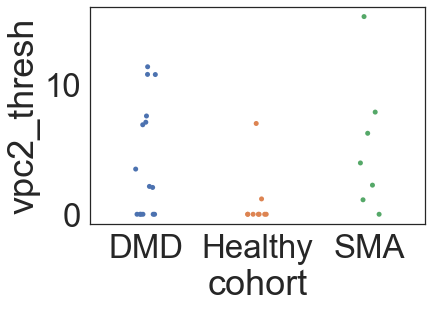

In [536]:
sns.stripplot(data=pids_df[['vpc2_thresh', 'cohort']], x='cohort', y='vpc2_thresh')

DMD v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-2.818e-01
Healthy v.s. SMA: t-test independent samples with Bonferroni correction, P_val=4.852e-02 stat=2.733e+00
DMD v.s. SMA: t-test independent samples with Bonferroni correction, P_val=6.997e-02 stat=2.456e+00
DMD v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=5.283e-01 stat=-1.398e+00
Healthy v.s. SMA: t-test independent samples with Bonferroni correction, P_val=2.398e-01 stat=1.888e+00
DMD v.s. SMA: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.419e-02
DMD v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.328e-01
Healthy v.s. SMA: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.319e-02
DMD v.s. SMA: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.596e-01
DMD v.s. Healthy: t-test independent samples with Bonferroni correction, P

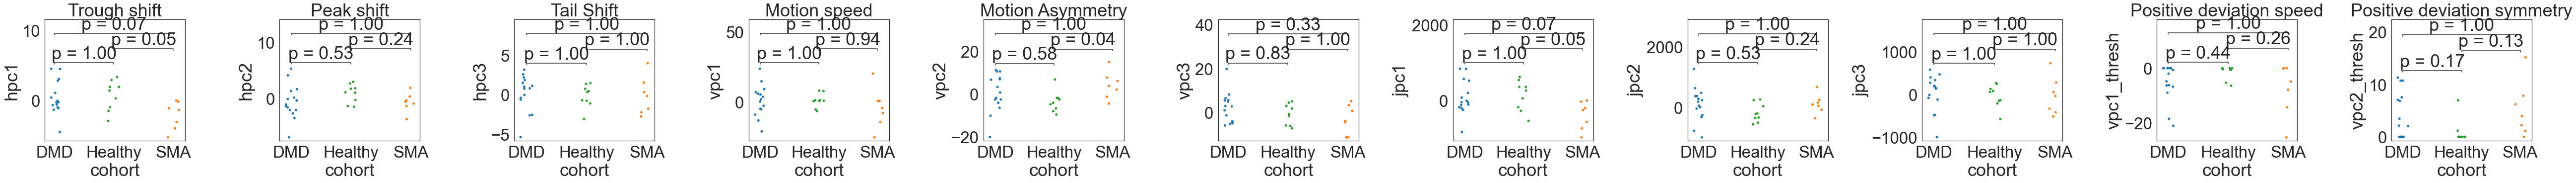

In [544]:
sns.set(font_scale=3)

sns.set_style(style='white')

my_pal = {"DMD": "tab:blue", "SMA": "tab:orange", "Healthy":"tab:green"}


titles = ['Trough shift', 'Peak shift', 'Tail Shift', 
          'Motion speed', 'Motion Asymmetry', '',
          '', '', '', 'Positive deviation speed', 'Positive deviation symmetry'
         ]

fig, axs = plt.subplots(1, len(pca_df.columns)+2, figsize=(8*len(pca_df.columns), 6))

for i, feat_col in enumerate(list(pca_df.columns)+['vpc1_thresh', 'vpc2_thresh']):

    pids_df_subset = pids_df[[feat_col, 'cohort']]
    a = sns.stripplot(data=pids_df_subset, x='cohort', y=feat_col, ax=axs[i], palette=my_pal)

    add_stat_annotation(a, data=pids_df_subset, x='cohort', y=feat_col, 
                        box_pairs=[("DMD", "Healthy"), ("DMD", "SMA"), ("SMA", "Healthy")],
                        test='t-test_ind', text_format='simple')
    axs[i].set_title(titles[i])
plt.tight_layout()
plt.savefig('boxplots_pca.png', dpi=300)


In [374]:
df = pids_df[['vpc1', 'cohort', 'PID']].sort_values(by='vpc1')

In [376]:
df['vpc1_z']=(df['vpc1']-df['vpc1'].mean())/df['vpc1'].std()

In [378]:
df

,vpc1,cohort,PID,vpc1_z
27,-25.160858,SMA,26.0,-2.396371
12,-20.945648,DMD,36.0,-1.993700
28,-14.214135,SMA,39.0,-1.350653
3,-13.100452,DMD,9.0,-1.244266
11,-8.897047,DMD,32.0,-0.842723
24,-7.817794,SMA,3.0,-0.739625
21,-6.365011,Healthy,28.0,-0.600843
22,-5.308932,Healthy,33.0,-0.499958
7,-5.100640,DMD,16.0,-0.480061
9,-4.778528,DMD,18.0,-0.449290


In [84]:
X = pids_df.iloc[:,17:-1]
Y = pids_df.iloc[:,-1]
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(Y)
#Y#_numeric = le.transform(Y)

In [85]:
def is_patient(x):
    if x=='Healthy':
        return 1
    else:
        return 0

Y_numeric = Y.apply(is_patient)

In [86]:
pids_df['cohort']

0         DMD
1         DMD
2         DMD
3         DMD
4         DMD
5         DMD
6         DMD
7         DMD
8         DMD
9         DMD
10        DMD
11        DMD
12        DMD
13        DMD
14        DMD
15    Healthy
16    Healthy
17    Healthy
18    Healthy
19    Healthy
20    Healthy
21    Healthy
22    Healthy
23    Healthy
24        SMA
25        SMA
26        SMA
27        SMA
28        SMA
29        SMA
30        SMA
Name: cohort, dtype: category
Categories (3, object): ['DMD', 'Healthy', 'SMA']

In [87]:
Y

0         DMD
1         DMD
2         DMD
3         DMD
4         DMD
5         DMD
6         DMD
7         DMD
8         DMD
9         DMD
10        DMD
11        DMD
12        DMD
13        DMD
14        DMD
15    Healthy
16    Healthy
17    Healthy
18    Healthy
19    Healthy
20    Healthy
21    Healthy
22    Healthy
23    Healthy
24        SMA
25        SMA
26        SMA
27        SMA
28        SMA
29        SMA
30        SMA
Name: cohort, dtype: category
Categories (3, object): ['DMD', 'Healthy', 'SMA']

In [193]:
# 30 percent of patients actually have good motor function

0.2903225806451613

<AxesSubplot:xlabel='vpc3', ylabel='vpc2'>

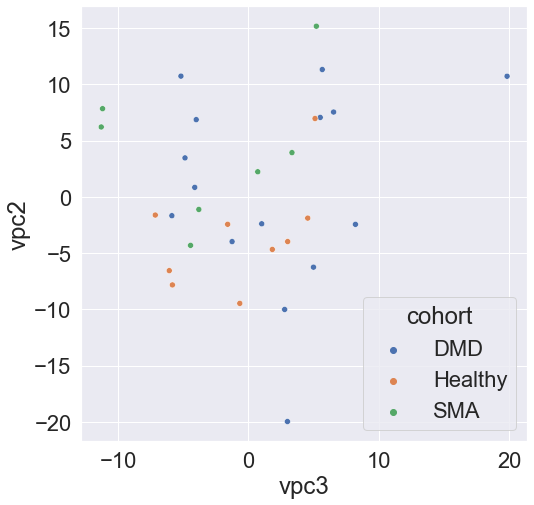

In [150]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.scatterplot(data=pids_df, x='vpc3', y='vpc2', hue='cohort')

In [165]:
pids_df.sort_values(by='vpc2')[['vpc1', 'vpc2', 'cohort', 'PID']]

,vpc1,vpc2,cohort,PID
12,-20.945648,-19.972512,DMD,36.0
9,-4.778528,-10.007227,DMD,18.0
16,1.035922,-9.467353,Healthy,19.0
21,-6.365011,-7.824604,Healthy,28.0
19,1.370262,-6.553834,Healthy,24.0
0,3.745174,-6.246269,DMD,1.0
17,1.479351,-4.669143,Healthy,21.0
29,20.335280,-4.308253,SMA,40.0
4,0.375395,-3.970593,DMD,11.0
22,-5.308932,-3.970213,Healthy,33.0


In [153]:
def classify(x):
    if x<=0:
        return 1
    else:
        return 0



0     1
1     0
2     1
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    0
26    0
27    0
28    0
29    1
30    0
Name: vpc2, dtype: int64

In [154]:
Y_pred = pids_df['vpc2'].apply(classify)

In [160]:
sum(abs(Y_numeric-Y_pred))/len(Y_numeric)

0.3225806451612903

In [131]:
X_train[[c]].shape, Y_numeric.shape

((27, 1), (31,))

In [337]:
X_df

,amplitude distance,phase distance,cos distance,pid,PID,Dom,Gender,Age,Cohort,Forearm_Length (cm),...,LCSS,Brooke,avg,std,max,min,cov,sent,ptop,kurt
0,14.732672,0.230354,0.037882,1.0,1.0,R,M,10.0,DMD,19.0,...,0.985,1.0,1.0937,111.268,205.519,-239.726,-71.0728,0.031426,445.245,-0.13909
1,20.227563,0.335691,0.198354,1.0,1.0,R,M,10.0,DMD,19.0,...,0.985,1.0,1.0937,111.268,205.519,-239.726,-71.0728,0.031426,445.245,-0.13909
2,15.600827,0.275527,0.090618,1.0,1.0,R,M,10.0,DMD,19.0,...,0.985,1.0,1.0937,111.268,205.519,-239.726,-71.0728,0.031426,445.245,-0.13909
3,11.509375,0.251459,0.034740,1.0,1.0,R,M,10.0,DMD,19.0,...,0.985,1.0,1.0937,111.268,205.519,-239.726,-71.0728,0.031426,445.245,-0.13909
4,20.131974,0.255515,0.166303,2.0,2.0,R,M,12.0,DMD,24.0,...,0.972,5.0,-1.8865,33.1308,33.9404,-157.31,-778.801,0.053936,191.25,8.71953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,32.762255,0.299500,0.079157,39.0,39.0,R,M,4.0,SMA,16.0,...,-,1.0,-,-,-,-,-,-,-,-
66,23.455163,0.229192,0.971747,40.0,40.0,R,M,19.0,SMA,26.5,...,-,3.0,-,-,-,-,-,-,-,-
67,23.455163,0.229192,0.971747,40.0,40.0,R,M,19.0,SMA,26.5,...,-,3.0,-,-,-,-,-,-,-,-
68,20.231791,0.245330,0.114528,41.0,41.0,R,F,12.0,SMA,23.0,...,-,3.0,-,-,-,-,-,-,-,-


In [192]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = LogisticRegression()

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
from sklearn.model_selection import cross_val_score


for c in X.columns:
    scores = []
    for trial in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, Y_numeric, test_size=0.2, shuffle=True)

        clf.fit(X_train, y_train)
        #LR.predict(X)
        score = clf.score(X_test,y_test)
        scores.append(score)
        
    #print (c, np.mean(cross_val_score(clf, X, Y_numeric, cv=5)))
        
    print(c, np.mean(scores))   

hpc1 0.6485714285714285
hpc2 0.63
hpc3 0.6657142857142856
vpc1 0.65
vpc2 0.6514285714285712
vpc3 0.64
jpc1 0.6657142857142856
jpc2 0.6914285714285713
jpc3 0.6542857142857144
vpc1_thresh 0.6414285714285713


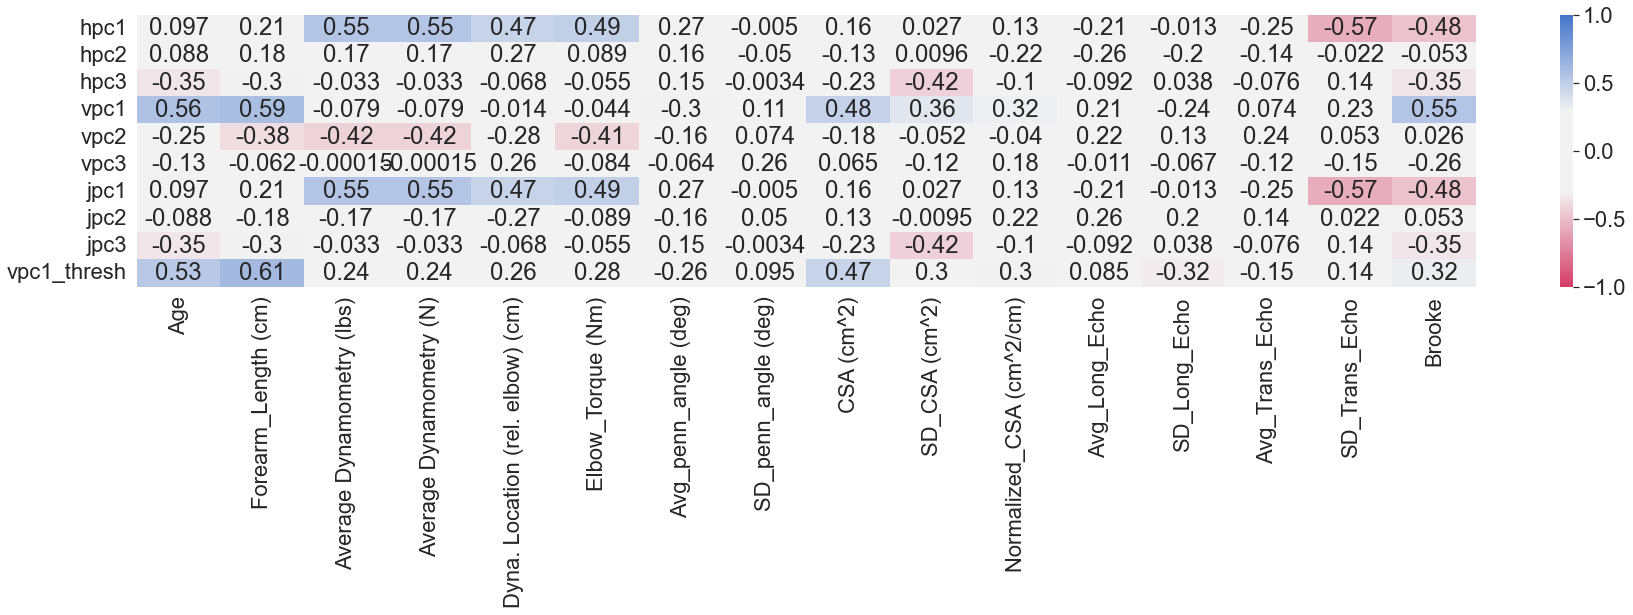

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))

corr = df_pca_analyze.groupby('PID').agg('mean').corr().iloc[16:,0:16]

dataplot = sb.heatmap(corr, cmap=sb.diverging_palette(0, 255, sep=77, as_cmap=True), annot=True, vmin=-1, vmax=1)
  
# displaying heatmap
mp.show()

In [242]:
df_processor['Cohort']

0     DMD
1     DMD
2     DMD
3     DMD
4     DMD
     ... 
65    SMA
66    SMA
67    SMA
68    SMA
69    SMA
Name: Cohort, Length: 70, dtype: object

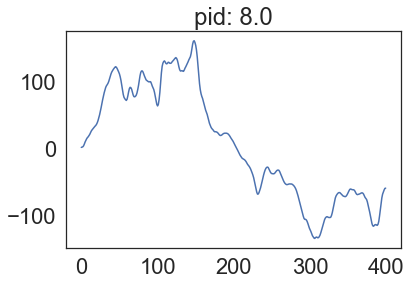

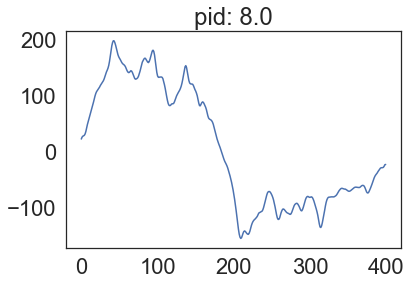

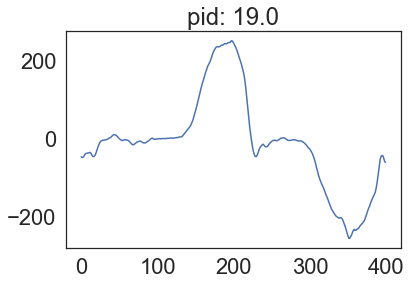

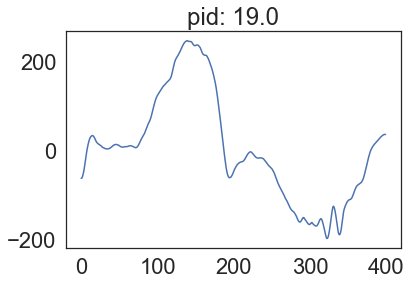

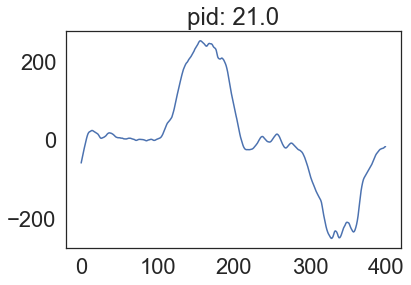

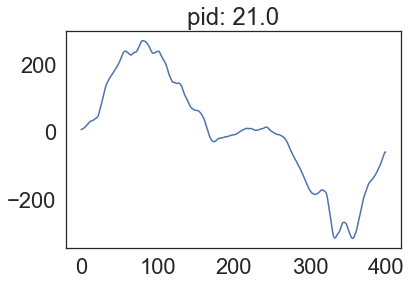

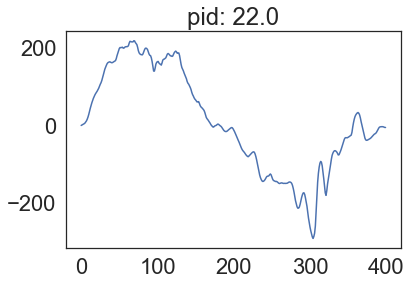

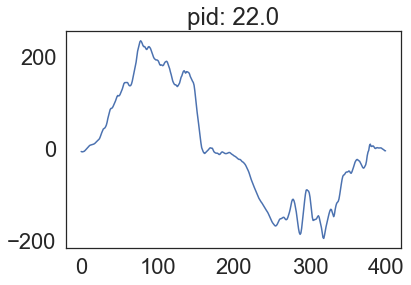

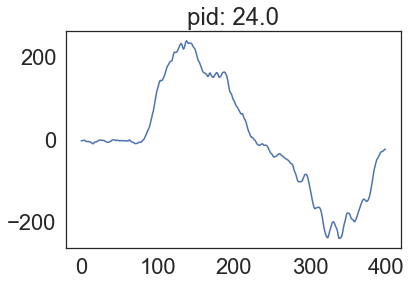

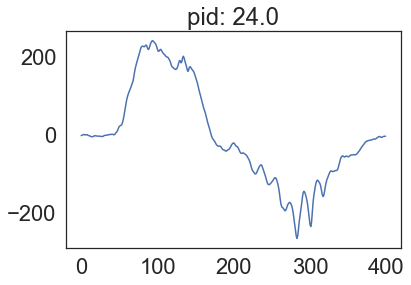

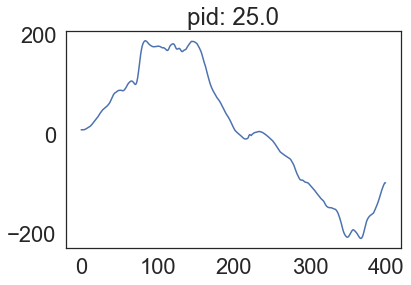

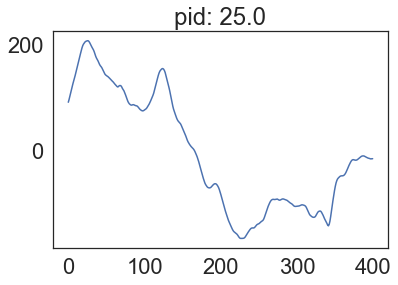

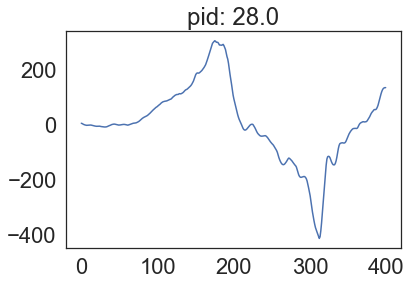

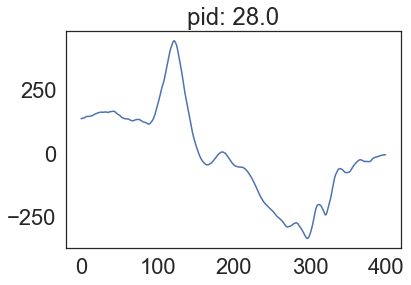

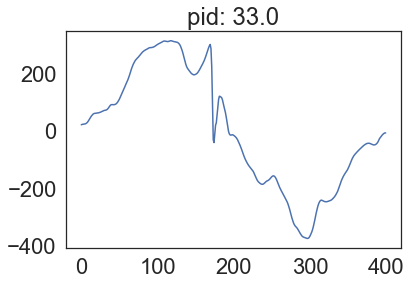

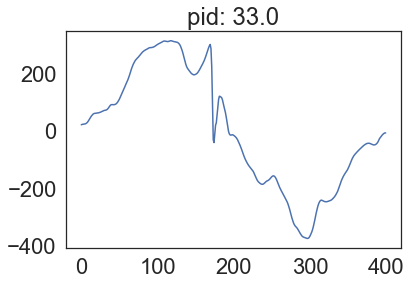

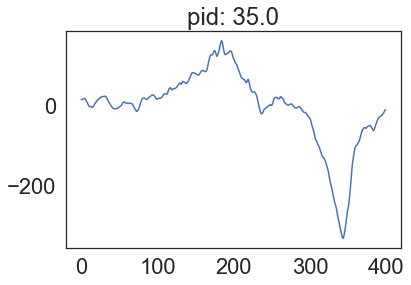

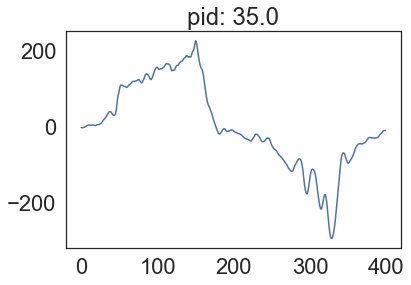

In [249]:
import matplotlib.pyplot as plt

for i in range(df_processor.shape[0]):
    if df_processor.iloc[i]['Cohort']=='Healthy':
        plt.figure()


        plt.title("pid: {}".format(df_processor.iloc[i,:]['pids']))
        plt.plot(df_processor.iloc[i,0:400])

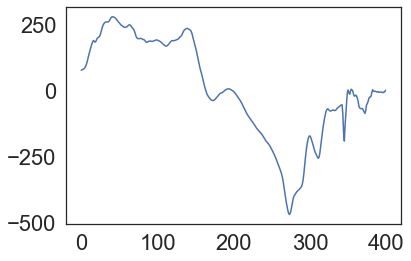

In [250]:
plt.plot(ys[6,:])

In [251]:
cohorts

array(['DMD', 'DMD', 'DMD', 'DMD', 'DMD', 'DMD', 'SMA', 'SMA', 'SMA',
       'SMA', 'DMD', 'DMD', 'Healthy', 'Healthy', 'DMD', 'DMD', 'SMA',
       'SMA', 'DMD', 'DMD', 'DMD', 'DMD', 'DMD', 'DMD', 'DMD', 'DMD',
       'DMD', 'DMD', 'SMA', 'SMA', 'DMD', 'DMD', 'DMD', 'DMD', 'DMD',
       'DMD', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'SMA',
       'SMA', 'DMD', 'DMD', 'Healthy', 'Healthy', 'DMD', 'DMD', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'DMD', 'DMD', 'DMD', 'DMD', 'DMD',
       'DMD', 'SMA', 'SMA', 'SMA', 'SMA', 'SMA', 'SMA'], dtype='<U7')

In [252]:
np.where(cohorts=='Control')

(array([], dtype=int64),)

In [66]:
idx_healthy = np.where(cohorts=='Control')
idx_not_healthy = np.where(cohorts!='Control')

In [67]:
df_processor_healthy = df_processor[df_processor['Cohort']=='Healthy']
df_processor_unhealthy = df_processor[df_processor['Cohort']!='Healthy']

In [255]:
# import matplotlib.pyplot as plt
# plt.plot(np.transpose(ys[idx_healthy]))

(array([4., 3., 2., 3., 2., 1., 1., 1., 0., 3.]),
 array([ 2. ,  5.3,  8.6, 11.9, 15.2, 18.5, 21.8, 25.1, 28.4, 31.7, 35. ]),
 <BarContainer object of 10 artists>)

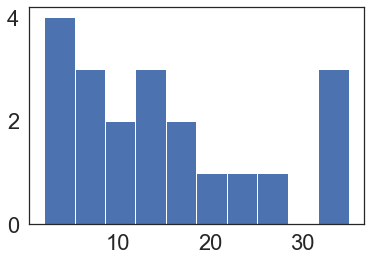

In [256]:
plt.hist(df_processor['Age'].unique())

In [68]:
ys_healthy = df_processor_healthy.iloc[:,1:401].values
time = np.array(range(400)).astype(float)
obj = fs.fdawarp(np.transpose(ys_healthy), time)

""" Calculate healthy mean"""
obj.srsf_align(parallel=True)

Initializing...
Compute Karcher Mean of 18 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


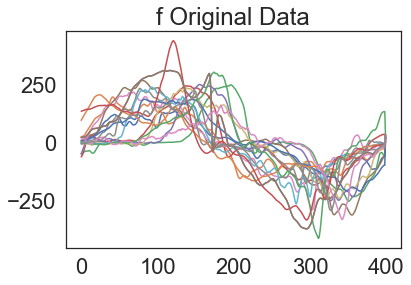

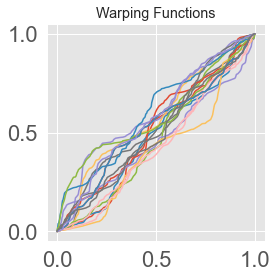

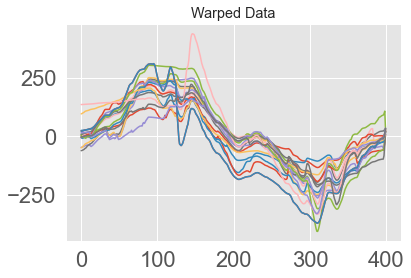

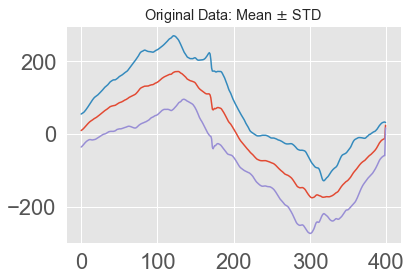

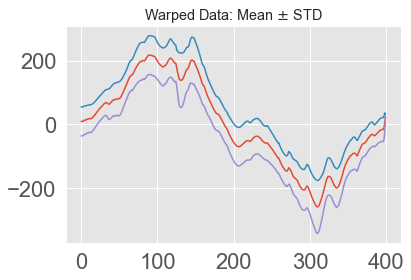

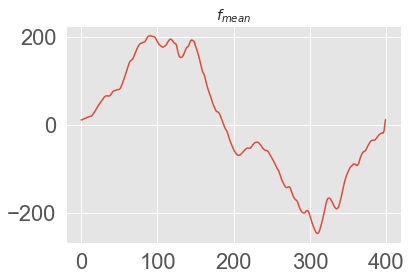

In [258]:
obj.plot()

In [69]:
""" Warp and align all trajectories to healthy """
obj_all = fs.fdawarp(np.transpose(df_processor.iloc[:,0:400].values), time)

In [70]:
""" Align dmd and sma to healthy """
obj_dmdsma = fs.fdawarp(np.transpose(df_processor_unhealthy.iloc[:,0:400].values), time)
obj_dmdsma.srsf_align(parallel=True)

Initializing...
Compute Karcher Mean of 52 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


In [261]:
ys 

array([[   2.37341353,    3.2792406 ,    4.06898496, ...,   -8.20321805,
          -8.841     ,    1.        ],
       [  -9.85185714,   -9.27671429,   -9.19828571, ..., -201.35871429,
        -202.012     ,    1.        ],
       [ -20.3102406 ,  -18.83902757,  -17.74124812, ..., -122.561     ,
        -122.561     ,    1.        ],
       ...,
       [ -41.97347368,  -41.38594737,  -40.77586466, ...,   -0.488     ,
          -0.488     ,   40.        ],
       [  -8.66647619,  -11.48963659,  -16.82086466, ...,  -12.87410276,
         -12.683     ,   41.        ],
       [  -8.66647619,  -11.48963659,  -16.82086466, ...,  -12.87410276,
         -12.683     ,   41.        ]])

In [75]:
obj_all.multiple_align_functions(obj.fmean)

# import matplotlib.pyplot as plt
# plt.rcParams["figure.facecolor"] = "w"

# #colors = np.repeat(u'tab:red', ys.shape[0])
# #colors[idx_healthy]='green'

# fig, axs = plt.subplots(2,4, figsize=(22, 10), facecolor='white')

# for i in range(2):
#     for j in range(4):
#         ax = axs[i,j]
#         ax.set_facecolor('white')
#         ax.patch.set_edgecolor('black')  
#         ax.spines['bottom'].set_color('0')
#         ax.spines['top'].set_color('0')
#         ax.spines['left'].set_color('0')
#         ax.spines['right'].set_color('0')
#         ax.patch.set_linewidth('1')

# axs[0,0].set_title('healthy trajectories')
# axs[0,0].plot(obj.fmean)
# axs[0,1].set_title('healthy warping functions')
# axs[0,1].plot(obj.gam)
# axs[0,2].set_title('healthy mean shape (reference)')
# axs[0,2].plot(obj.fmean, color='black', ms=20)
# axs[0,3].plot(obj.fmean, color='black', ms=20, label='healthy mean shape')
# axs[0,3].legend(facecolor="white")
# axs[1,3].plot(obj.fmean, color='black', ms=20, label='healthy mean shape')
# axs[0,3].set_title('healthy aligned to mean shape')
# axs[0,3].plot(obj.fn)

# axs[1,0].set_title('DMD + SMA trajectories')
# axs[1,1].set_title('DMD + SMA warping functions')
# axs[1,3].set_title('DMD + SMA aligned to healthy')


# axs[1,2].set_title('DMA + SMA mean shape')
# axs[1,2].plot(obj_dmdsma.fmean)

# for i, row in (df_processor.iterrows()):
    
    
#     if row['Cohort']!='Healthy':
    
#         axs[1,0].plot(row.iloc[1:400])
#         axs[1,1].plot(obj_all.gam[:,i])
#         axs[1,3].plot(obj_all.fn[:,i])
#     #axs[1,0].plot(obj_all.f.mean(axis=1))
#     #axs[1,2].plot(obj.fmean)
#     #axs[1,2].plot(obj.fn.mean(axis=1))
    
# plt.legend(facecolor="white")
# ax = plt.gca()
#ax.set_facecolor('white')

In [71]:
ys = df_processor.iloc[:,1:401]

In [264]:
visits

array(['3-26-21', '3-26-21', '7-8-21', '7-8-21', '2-11-21', '2-11-21',
       '2-24-21', '2-24-21', '7-20-21', '7-20-21', '3-11-21', '3-11-21',
       '4-21-21', '4-21-21', '9-22-21', '9-22-21', '3-24-21', '3-24-21',
       '3-24-21', '3-24-21', '9-22-21', '9-22-21', '10-15-21', '10-15-21',
       '4-28-21', '4-28-21', '4-28-21', '4-28-21', '5-13-21', '5-13-21',
       '5-13-21', '5-13-21', '5-13-21', '5-13-21', '5-13-21', '5-13-21',
       '5-14-21', '5-14-21', '6-16-21', '6-16-21', '6-16-21', '6-16-21',
       '6-16-21', '6-16-21', '6-16-21', '6-16-21', '6-23-21', '6-23-21',
       '6-23-21', '6-23-21', '6-23-21', '6-23-21', '7-8-21', '7-8-21',
       '7-15-21', '7-15-21', '7-27-21', '7-27-21', '7-28-21', '7-28-21',
       '7-28-21', '7-28-21', '8-25-21', '8-25-21', '8-25-21', '8-25-21',
       '10-18-21', '10-18-21', '10-19-21', '10-19-21'], dtype='<U8')

In [265]:
len(set(pids))

31

In [266]:
# old_mean = np.loadtxt('/Users/shashwat/workspace/uextend-fda/SRVF/uextend/old_mean.txt')

In [267]:
# old_mean

In [268]:
# ys

In [269]:
# ys

In [270]:
time

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [271]:
df_processor.shape

(70, 440)

In [272]:
df_processor['Cohort']

0     DMD
1     DMD
2     DMD
3     DMD
4     DMD
     ... 
65    SMA
66    SMA
67    SMA
68    SMA
69    SMA
Name: Cohort, Length: 70, dtype: object

In [273]:
list(df_processor.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [72]:
def arcdist(a, b):
    return 1.0 - ((np.transpose(a)@b)/(np.linalg.norm(a)*np.linalg.norm(b)))

In [ ]:
# import plotly.express as px

# fig = px.strip(pids_df, y="amp distance (z scored)", color='cohort', )
# fig.show()

In [ ]:
# import plotly.express as px

# fig = px.strip(pids_df, y="amp distance (z scored)", color='cohort')
# fig.show()

In [ ]:
# import plotly.express as px

# fig = px.strip(pids_df, y="phase distance (z scored)", color='cohort')
# fig.show()

In [78]:
""" Raw plot of amplitude and phase distances """
from collections import defaultdict
from tqdm import tqdm

amp_all = []
phase_all = []
pids_all = []

rows = []

amplitude_dists = defaultdict(list)
phase_dists = defaultdict(list)
pids_dicts = defaultdict(list)


""" Calculate distances """

for i in tqdm(range(df_processor.shape[0])):    
    amplitude_dist, phase_dist = elastic_distance(obj_all.fn[:,i], obj.fmean, time)
    cos_dist = arcdist(obj_all.fn[:,i], obj.fmean)
    
    amplitude_dists[cohorts[i]].append(amplitude_dist)
    phase_dists[cohorts[i]].append(phase_dist)
    pids_dicts[cohorts[i]].append(pids[i])
    
    row = [amplitude_dist, phase_dist, cos_dist, pids[i], cohorts[i], df_processor.iloc[i,0:400], obj_all.fn[:,i]]
    
    rows.append(row)
    
    amp_all.append(amplitude_dist)
    phase_all.append(phase_dist)

""" Dataframe with all distances and statistics """
    
df_all = pd.DataFrame(rows, columns=['amplitude distance', 'phase distance', 'cos distance', 'pid', 'cohort',  'y', 'y_aligned'])

#df_all['pid'] = [(int(p)) for p in df_all['pid']]
#df_all['visit']=pd.to_datetime(df['visit'])

#df_all_healthy = df_all[df_all['cohort']=='Healthy']
#df_pid_healthy = df_all_healthy.groupby('pid').agg('mean')
# df_all['amp distance (z scored)']=(df_all['amplitude distance']-df_pid_healthy['amplitude distance'].mean())/df_pid_healthy['amplitude distance'].std()
# df_all['phase distance (z scored)']=(df_all['phase distance']-df_pid_healthy['phase distance'].mean())/df_pid_healthy['phase distance'].std()

#df_all_healthy = df_all[df_all['cohort']=='Healthy']
#df_all['amp distance (z scored)']=(df_all['amplitude distance']-df_all_healthy['amplitude distance'].mean())/df_all_healthy['amplitude distance'].std()
#df_all['phase distance (z scored)']=(df_all['phase distance']-df_all_healthy['phase distance'].mean())/df_all_healthy['phase distance'].std()


""" Box plots from plotly (useful to look at first before going into distances) """
# pids_df = []

# for c, df_c in df_all.groupby('cohort'):
#     plt.figure()
#     pid_df = df_c.groupby('pid').agg('mean')
#     pid_df['cohort']=c
#     pids_df.append(pid_df)
    
# pids_df = pd.concat(pids_df, axis=0)
# pids_df['cohort']=pids_df['cohort'].astype('category')
# pids_df = pids_df.reset_index()

# import plotly.express as px

# fig = px.strip(pids_df, y="phase distance (z scored)", color='cohort', )
# fig.show()
#     #df_c.groupby('pid').agg('mean')



""" Plotting all trajectories """
    
# for i in tqdm(range(df_processor.shape[0])):
#     fig, axs = plt.subplots(1, 3, figsize=(15, 3))
    
    
#     axs[0].plot(df_processor.iloc[i,0:400])
#     axs[1].plot(obj_all.fn[:,i])
#     axs[1].plot(obj_all.fmean)
#     axs[2].plot(obj_all.gam[:,i])
#     axs[0].set_title(str(df_processor.iloc[i,]['pids']) + " visit: " + df_processor.iloc[i,]['visits'])
    
#     axs[1].set_title(df_processor.iloc[i,]['Cohort']  + ' ' + str(df_all.iloc[i,]['amp distance (z scored)']))
    
#     axs[2].set_title(df_processor.iloc[i,]['Cohort']  + ' ' + str(df_all.iloc[i,]['phase distance (z scored)']))
    
#     plt.show()

100%|███████████████████████████████████████████| 70/70 [00:20<00:00,  3.47it/s]


' Plotting all trajectories '

## Create one dataframe to rule them all

In [93]:
df_dist = df_all[['amplitude distance','cos distance']]
df_dist

,amplitude distance,cos distance
0,18.576567,0.186191
1,14.399597,0.040516
2,16.409152,0.111924
3,11.431414,0.050459
4,20.427060,0.289935
...,...,...
65,38.625903,0.251194
66,18.995762,1.026906
67,18.995762,1.026906
68,17.480318,0.042307


In [94]:
df_pca_analyze

,PID,Visit #,Sensor Data Date,Age,Cohort,Forearm_Length (cm),CSA (cm^2),Normalized_CSA (cm^2/cm),Avg_Long_Echo,Avg_Trans_Echo,...,hpc2,hpc3,vpc1,vpc2,vpc3,jpc1,jpc2,jpc3,vpc1_thresh,vpc2_thresh
0,1,1,2021-03-26,10,DMD,19.0,2.90,0.258947,51.48,68.31,...,-1.060082,-2.004775,10.082398,7.179069,-7.971346,-34610.507971,10600.816941,-20047.748908,0.000000,7.179069
1,1,1,2021-03-26,10,DMD,19.0,2.90,0.258947,51.48,68.31,...,1.094474,3.614097,10.942590,-4.400605,-2.804047,-28460.566380,-10944.729066,36140.973123,0.000000,0.000000
2,1,2,2021-07-08,10,DMD,20.0,3.67,0.183500,52.47,49.04,...,5.010229,0.671625,-5.366227,4.223099,-16.177652,-32255.102675,-50102.284820,6716.257491,-5.366227,4.223099
3,1,2,2021-07-08,10,DMD,20.0,3.67,0.183500,52.47,49.04,...,2.640125,-2.346278,3.671838,-3.335204,-6.273047,-12531.595668,-26401.253264,-23462.770299,0.000000,0.000000
4,2,1,2021-02-11,12,DMD,24.0,7.59,0.316250,53.40,41.45,...,-3.780018,4.247309,15.127634,-6.472058,4.809821,-19037.117077,37800.189852,42473.083836,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,39,1,2021-08-25,4,SMA,16.0,2.66,0.166250,34.61,31.26,...,0.539049,2.483646,-13.020670,25.042385,8.018663,19596.571704,-5390.493616,24836.455509,-13.020670,25.042385
66,40,1,2021-10-18,19,SMA,26.5,2.64,0.099623,52.06,70.96,...,1.807305,2.192522,14.327965,-4.594207,-2.807352,36487.560800,-18073.044236,21925.224361,0.000000,0.000000
67,40,1,2021-10-18,19,SMA,26.5,2.64,0.099623,52.06,70.96,...,1.807305,2.192522,14.327965,-4.594207,-2.807352,36487.560800,-18073.044236,21925.224361,0.000000,0.000000
68,41,1,2021-10-19,12,SMA,23.0,2.52,0.109565,51.41,69.44,...,-0.887722,2.405718,6.422970,1.148474,-3.096520,7844.852387,8877.219361,24057.180713,0.000000,1.148474


In [276]:
#X_df=pd.merge(df_all[['amplitude distance', 'phase distance', 'cos distance', 'pid']], baseline_df, left_on='pid', right_on='PID', how='inner')

In [83]:
#df_all['amp distance (z scored)']

In [84]:
#XX_df = pd.concat([df_pca_analyze[pca_df.columns], X_df], axis=1)

In [85]:
#XX_df

In [86]:
# for i, gg_df in XX_df.groupby('Cohort'):
#     print(i)
#     plt.figure(figsize=(30, 5))

#     corr = gg_df.groupby('pid').agg('mean').corr().iloc[0:12, 13:]

#     dataplot = sb.heatmap(corr, cmap=sb.diverging_palette(0, 255, sep=77, as_cmap=True), annot=True, vmin=-1, vmax=1)
#     #plt.tight_layout()
#     #plt.savefig('corr_matrix.png', dpi=300, bbox_inches='tight')  
#     # displaying heatmap
#     mp.show()

In [87]:
# import matplotlib.pyplot as plt


# corr = XX_df.groupby('pid').agg('mean').corr().iloc[0:12, 13:]

# dataplot = sb.heatmap(corr, cmap=sb.diverging_palette(0, 255, sep=77, as_cmap=True), annot=True, vmin=-1, vmax=1)
# plt.tight_layout()
# plt.savefig('corr_matrix.png', dpi=300, bbox_inches='tight')  
# # displaying heatmap
# mp.show()

In [89]:
#X_df=pd.merge(X_df[['amplitude distance', 'phase distance', 'cos distance', 'pid']], baseline_df, left_on='pid', right_on='PID', how='inner')

In [88]:
# import matplotlib.pyplot as mp

# import seaborn as sb

# plt.figure(figsize = (12,12))

# corr = X_df.groupby('pid').agg('mean').corr()[['amplitude distance', 'phase distance', 'cos distance']].iloc[3:]

# dataplot = sb.heatmap(corr, cmap=sb.diverging_palette(0, 255, sep=77, as_cmap=True), annot=True, vmin=-1, vmax=1)
  
# # displaying heatmap
# mp.show()

In [90]:
#X_df

In [91]:
# df_all_boxplot = X_df[['Age', 'Forearm_Length (cm)', 
#                        'amplitude distance', 'phase distance', 'cos distance', 'Cohort', 'pid']].groupby(['pid']).agg({'Cohort': 'first',
#                                                                                        'amplitude distance': 'mean', 
#                                                                                         'phase distance': 'mean',
#                                                                                         'cos distance': 'mean',
#                                                                                         'Age': 'mean',
#                                                                                         'Forearm_Length (cm)': 'mean'
#                                                                                        })

In [95]:
df_all_boxplot = pd.concat([df_dist, df_pca_analyze], axis=1)
df_all_boxplot

,amplitude distance,cos distance,PID,Visit #,Sensor Data Date,Age,Cohort,Forearm_Length (cm),CSA (cm^2),Normalized_CSA (cm^2/cm),...,hpc2,hpc3,vpc1,vpc2,vpc3,jpc1,jpc2,jpc3,vpc1_thresh,vpc2_thresh
0,18.576567,0.186191,1,1,2021-03-26,10,DMD,19.0,2.90,0.258947,...,-1.060082,-2.004775,10.082398,7.179069,-7.971346,-34610.507971,10600.816941,-20047.748908,0.000000,7.179069
1,14.399597,0.040516,1,1,2021-03-26,10,DMD,19.0,2.90,0.258947,...,1.094474,3.614097,10.942590,-4.400605,-2.804047,-28460.566380,-10944.729066,36140.973123,0.000000,0.000000
2,16.409152,0.111924,1,2,2021-07-08,10,DMD,20.0,3.67,0.183500,...,5.010229,0.671625,-5.366227,4.223099,-16.177652,-32255.102675,-50102.284820,6716.257491,-5.366227,4.223099
3,11.431414,0.050459,1,2,2021-07-08,10,DMD,20.0,3.67,0.183500,...,2.640125,-2.346278,3.671838,-3.335204,-6.273047,-12531.595668,-26401.253264,-23462.770299,0.000000,0.000000
4,20.427060,0.289935,2,1,2021-02-11,12,DMD,24.0,7.59,0.316250,...,-3.780018,4.247309,15.127634,-6.472058,4.809821,-19037.117077,37800.189852,42473.083836,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,38.625903,0.251194,39,1,2021-08-25,4,SMA,16.0,2.66,0.166250,...,0.539049,2.483646,-13.020670,25.042385,8.018663,19596.571704,-5390.493616,24836.455509,-13.020670,25.042385
66,18.995762,1.026906,40,1,2021-10-18,19,SMA,26.5,2.64,0.099623,...,1.807305,2.192522,14.327965,-4.594207,-2.807352,36487.560800,-18073.044236,21925.224361,0.000000,0.000000
67,18.995762,1.026906,40,1,2021-10-18,19,SMA,26.5,2.64,0.099623,...,1.807305,2.192522,14.327965,-4.594207,-2.807352,36487.560800,-18073.044236,21925.224361,0.000000,0.000000
68,17.480318,0.042307,41,1,2021-10-19,12,SMA,23.0,2.52,0.109565,...,-0.887722,2.405718,6.422970,1.148474,-3.096520,7844.852387,8877.219361,24057.180713,0.000000,1.148474


In [102]:
df_all_boxplot.to_csv('df_all_boxplot.csv', index=False)

In [1]:
#!pip install statannot

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_all_boxplot = pd.read_csv('df_all_boxplot.csv')

In [5]:
#df_all_boxplot

DMD v.s. SMA: t-test independent samples with Bonferroni correction, P_val=3.587e-01 stat=1.584e+00
SMA v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=1.427e-01 stat=-2.060e+00
DMD v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-7.620e-01
DMD v.s. SMA: t-test independent samples with Bonferroni correction, P_val=1.394e-01 stat=-2.042e+00
SMA v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=5.503e-05 stat=5.028e+00
DMD v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=2.394e-05 stat=4.958e+00
DMD v.s. SMA: t-test independent samples with Bonferroni correction, P_val=4.820e-01 stat=-1.424e+00
SMA v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=1.846e-03 stat=3.798e+00
DMD v.s. Healthy: t-test independent samples with Bonferroni correction, P_val=2.784e-03 stat=3.512e+00


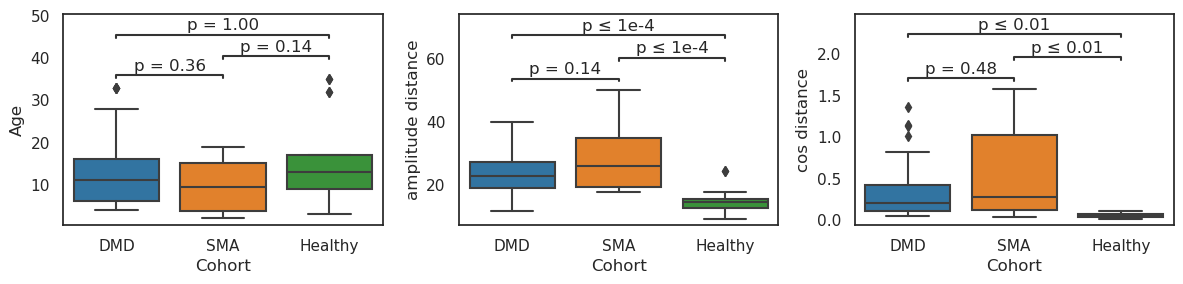

In [6]:
from statannot import add_stat_annotation
import seaborn as sns

feat_columns = ['Age', 'amplitude distance', 'cos distance']

sns.set(font_scale=1)

sns.set_style(style='white')

my_pal = {"DMD": "tab:blue", "SMA": "tab:orange", "Healthy":"tab:green"}


df_final_box = df_all_boxplot.groupby(['PID']).agg({'Age':'mean',
                                    'Forearm_Length (cm)':'mean',
                                    'CSA (cm^2)':'mean',
                                    'Avg_Echo':'mean',
                                    'Normalized Elbow Torque (Nm/cm)':'mean',
                                    'vpc1':'mean',
                                    'vpc2':'mean',
                                    'vpc3':'mean',
                                    'Brooke':'mean',
                                    '                
                                    'Cohort':'first',
                                    'PID':'first'})


fig, axs = plt.subplots(1, len(feat_columns), figsize=(4*len(feat_columns), 3))

for i, feat_col in enumerate(feat_columns):

    #pids_df_subset = pids_df[[feat_col, 'cohort']]
    a = sns.boxplot(data=df_all_boxplot, x='Cohort', y=feat_col, ax=axs[i], palette=my_pal)

    add_stat_annotation(a, data=df_all_boxplot, x='Cohort', y=feat_col, 
                        box_pairs=[("DMD", "Healthy"), ("DMD", "SMA"), ("SMA", "Healthy")],
                        test='t-test_ind', text_format='simple')
    #axs[i].set_title(titles[i])
plt.tight_layout()
#plt.savefig('boxplot.png', dpi=300)


In [7]:
#!pip install statannotations

In [3]:
# import seaborn as sns

# from statannotations.Annotator import Annotator

# df = sns.load_dataset("tips")
# x = "day"
# y = "total_bill"
# order = ['Sun', 'Thur', 'Fri', 'Sat']

# ax = sns.boxplot(data=df, x=x, y=y, order=order)

# pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")]

# annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

## Regression (single mode)

In [ ]:
data_mat = X_df.groupby('pid').agg('mean')

data_mat = data_mat.fillna(data_mat.median())  # fails

fig, axs = plt.subplots(2, 2, figsize=(30,10))

for j in range(2):

    data_X = data_mat.iloc[:,j:j+1]

    data_Y = data_mat.iloc[:,4:]
    data_Y_zscored = (data_Y - data_Y.mean())/data_Y.std()

    from sklearn.model_selection import train_test_split
    from sklearn.cross_decomposition import PLSRegression

    coefs = []

    """ Calculate correlation on held out test set """
    for trial in range(100):

        X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y_zscored, test_size=0.4)

        plsca = PLSRegression(n_components=1)
        plsca.fit(X_train, Y_train)
        #X_train_r, Y_train_r = plsca.transform(X, y_tr)
        X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

        coef = (np.corrcoef(X_test_r.squeeze(), Y_test_r.squeeze())[1,0])
        coefs.append(coef)

    mean_coef = np.mean(coefs)

    """ Final scatter plot """

    X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y_zscored, test_size=0.4)

    rank = 1

    plsca = PLSRegression(n_components=rank)
    plsca.fit(X_train, Y_train)
    #X_train_r, Y_train_r = plsca.transform(X, y_tr)
    X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

    
    axs[j,0].plot(plsca.y_weights_)
    axs[j,0].set_xticks(range(data_Y.columns.shape[0]))
    axs[j,0].set_xticklabels(data_Y.columns, rotation=90)
    axs[j,1].scatter(X_test_r.squeeze(), Y_test_r.squeeze())
    axs[j,1].set_title(mean_coef)
    axs[j,0].set_ylim([-1,1])

plt.tight_layout()

# plt.figure(figsize=(30, 5))
# weights = np.linalg.pinv(X_train)@Y_train
# plt.plot(np.transpose(weights))

# plt.figure()
# plt.scatter(X_test.iloc[:,0], Y_test@np.transpose(weights).squeeze())

# plt.title(np.corrcoef(X_test.iloc[:,0], Y_test@np.transpose(weights).squeeze())[1,0])

In [ ]:
np.corrcoef(X_test.iloc[:,0], Y_test@np.transpose(weights).squeeze())

In [ ]:
np.savetxt('ys_aligned.txt', obj_all.fn)
np.savetxt('ys_orig.txt', ys)

In [ ]:
df_all.to_csv('df_all.csv')

In [ ]:
df_all[df_all['cohort']=='SMA']

In [ ]:
amplitude_dists

In [ ]:
# import seaborn as sns
# sns.boxplot(amplitude_dists)

In [ ]:
from scipy import stats
fig, axs = plt.subplots(1, 2, figsize=(15, 3))

xlabels = ['amplitude distance', 'phase distance']

for i, dict1 in enumerate([amplitude_dists, phase_dists]):
    tstat, pval=stats.ttest_ind(dict1['DMD']+dict1['SMA'], dict1['Healthy'], equal_var=False)


    #dict1= amplitude_dists

    labels, data = [*zip(*dict1.items())]  # 'transpose' items to parallel key, value lists

    # or backwards compatable    
    labels, data = dict1.keys(), dict1.values()
    #ax = plt.gca()
    #ax.set_facecolor('white')
    box = axs[i].boxplot(data, patch_artist=True)



    colors = ['tab:red', 'tab:orange', 'tab:green']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    axs[i].set_xticks(range(1, len(labels) + 1), labels)
    #axs[i].set_title("pha")
    #axs[i].set_title("amplitude distances: ")
    axs[i].set_title("t-statistic: {}, pval: {}".format(round(tstat, 3), round(pval, 5)))
    axs[i].set_xlabel(xlabels[i])
    axs[i].legend()

plt.legend()
plt.show()


In [ ]:
amplitude_dists

In [ ]:
# dict1= phase_dists

# tstat, pval = stats.ttest_ind(phase_dists['DMD'], phase_dists['Healthy'], equal_var=False)

# labels, data = [*zip(*dict1.items())]  # 'transpose' items to parallel key, value lists

# # or backwards compatable    
# labels, data = dict1.keys(), dict1.values()
# plt.xticks(range(1, len(labels) + 1), labels)


# box = plt.boxplot(data, patch_artist=True)



# colors = ['tab:red', 'tab:orange', 'tab:green']
# for patch, color in zip(box['boxes'], colors):
#     patch.set_facecolor(color)
# plt.xticks(range(1, len(labels) + 1), labels)
# plt.title("tstatistic: {}, pval: {}".format(tstat, pval))
# plt.show()





In [ ]:
""" Flat lists to allow conversion into pandas """
amp_dists_flat = []
phase_dists_flat = []
pids_flat = []
cohorts_flat = []

""" Append amplitude flat lists """

for key, val in amplitude_dists.items():
    amp_dists_flat.extend(val)
    cohorts_flat.extend([key]*len(val))
    
for key, val in pids_dicts.items():
    pids_flat.extend(val)

""" Append phase flat list """
for key, val in phase_dists.items():
    phase_dists_flat.extend(val)

In [ ]:
X_healthy = X_df[X_df['cohort']=='Control']

In [ ]:
mu_healthy = X_healthy[['amp', 'phase']].values.mean(axis=0)
cov_healthy = np.cov(np.transpose(X_healthy[['amp', 'phase']].values))

In [ ]:
cov_healthy

In [ ]:
def mahalanobis(x, mu, cov):
    return np.transpose((x-mu))@(np.linalg.inv(cov))@(x-mu)

def row_mahalnobis(row):
    return mahalanobis(row[['amp', 'phase']], mu_healthy, cov_healthy)




In [ ]:
row_mahalnobis(X_df.iloc[1])





In [ ]:
X_df['mahalanobis'] = X_df.apply(row_mahalnobis, axis=1)

In [ ]:
X_df['pids']=pids

In [ ]:
X_df

In [ ]:
data = X_healthy[['amp', 'phase']].values
x = [[1,1]]

In [ ]:
mu_healthy.shape

In [ ]:
X_healthy[['amp', 'phase']]

In [ ]:
df_all

In [ ]:
# prelude for a mixed effects model

# create df with these attributes


# create a new dataframe
# df = pd.DataFrame()
# df['cohort'] = cohorts_flat
# df['visit'] = visits
# df['amp']=amp_dists_flat
# df['phase']=phase_dists_flat



# set datetime timestamp for visits column

colors = ['green', 'orange', 'red']

def days_first_visit_df2(df_all, visit_col='visit'):

    ctr = 0

    pids_df = []

    # group by cohort (optional for now?)
    # group by pid
    for j, pid_df in df_all.groupby('pid'):
        if(len(pid_df[visit_col].unique())>1):
            #import pdb; pdb.set_trace()
            pid_df['days from first visit'] = (pid_df[visit_col] - pid_df[visit_col].min()).dt.days

            pids_df.append(pid_df)

                #print(pid_df['cohort'].values[0], pid_df['pid'].values[0])

                #plt.scatter(pid_df['rel_time'].values, pid_df['phase'].values, color=colors[ctr])
                #plt.figure()


    return pd.concat(pids_df, axis=0)

df_all_subset = days_first_visit_df(df_all)

In [ ]:
df_all_subset['pid_str'] = df_all_subset['pid'].astype('str')

In [ ]:
sns.set_palette("tab10")
sns.scatterplot(df_all_subset, x='days from first visit', y='phase distance (z scored)', hue='pid_str', legend=True)
sns.lineplot(df_all_subset, x='days from first visit', y='phase distance (z scored)', hue='pid_str', legend=False)

In [ ]:
sns.set_palette("tab10")
sns.scatterplot(df_all_subset, x='days from first visit', y='amp distance (z scored)', hue='pid_str', legend=True)
sns.lineplot(df_all_subset, x='days from first visit', y='amp distance (z scored)', hue='pid_str', legend=False)

In [ ]:
demographics = pd.read_excel('200178.CRF.2021.02.11.xlsx')
demographics = demographics.dropna(subset='Subj#')

demographics['pid'] = [int(p) for p in demographics['Subj#']]

demographics_filt = demographics[demographics['pid'].isin([1,3,11,12])]

In [ ]:
df_all_subset['visit']

In [ ]:
df_subset_demographics = pd.merge(df_all_subset, demographics, how='left', left_on=['pid', 'visit'], right_on=['pid', 'Ultrasound Date'])

In [ ]:
df_s_d = days_first_visit_df2(demographics_filt, visit_col='Ultrasound Date')
df_s_d['pid_str']=df_s_d['pid'].astype('str')

In [ ]:
df_s_d.columns

In [ ]:
sns.set_palette("tab10")
sns.scatterplot(df_s_d, x='days from first visit', y='Average Dyn. (lbsf)', hue='pid_str', legend=True)
sns.lineplot(df_s_d, x='days from first visit', y='Average Dyn. (lbsf)', hue='pid_str', legend=False)

In [ ]:
df_s_d[df_s_d['pid']==12]['Ultrasound Date']

In [ ]:
df_s_d[df_s_d['pid']==12]['days from first visit']

In [ ]:
df_s_d[df_s_d['pid']==12][['Ultrasound Date', 'days from first visit', 'Average Dyn. (lbsf)']]

In [ ]:
demographics = pd.read_excel('200178.CRF.2021.02.11.xlsx')
demographics = demographics.dropna(subset='Subj#')

demographics['pid'] = [int(p) for p in demographics['Subj#']]

demographics_filt = demographics[demographics['pid'].isin([1,3,11,12])]

In [ ]:
df_all

In [ ]:
sns.scatterplot(data=df_all, x='amp distance (z scored)', y='phase distance (z scored)', hue='cohort')

In [ ]:
sns.boxplot(data=df_all, x='cohort', y='amp distance (z scored)')

In [ ]:
sns.boxplot(data=df_all, x='cohort', y='phase distance (z scored)')

In [ ]:
df_s_d[df_s_d['pid']==1][['Ultrasound Date', 'days from first visit', 'Average Dyn. (lbsf)']]

In [ ]:
df_all_subset[df_all_subset['pid']==1]

In [ ]:
sns.set_palette("tab10")
sns.scatterplot(df_s_d, x='Ultrasound Date', y='Average Dyn. (lbsf)', hue='pid_str', legend=True)
sns.lineplot(df_s_d, x='Ultrasound Date', y='Average Dyn. (lbsf)', hue='pid_str', legend=False)
plt.xticks(rotation=45)

In [ ]:
df_all_subset['pid_str']=df_all_subset['pid'].astype('str')

In [ ]:
sns.set_palette("tab10")
sns.scatterplot(df_all_subset, x='visit', y='phase distance (z scored)', hue='pid_str', legend=True)
sns.lineplot(df_all_subset, x='visit', y='phase distance (z scored)', hue='pid_str', legend=False)
plt.xticks(rotation=45)

In [ ]:
sns.set_palette("tab10")
sns.scatterplot(df_all_subset, x='visit', y='amp distance (z scored)', hue='pid_str', legend=True)
sns.lineplot(df_all_subset, x='visit', y='amp distance (z scored)', hue='pid_str', legend=False)
plt.xticks(rotation=45)

In [ ]:
brooke = pd.read_excel('brooke.excel.xlsx')

In [ ]:
brooke['pid_str']=brooke['pid'].astype('str')

In [ ]:
sns.set_palette("tab10")
sns.scatterplot(brooke, x='visit', y='brooke', hue='pid_str', legend=True)
sns.lineplot(brooke, x='visit', y='brooke', hue='pid_str', legend=False)
plt.xticks(rotation=45)

In [ ]:
sns

In [ ]:
from tqdm import tqdm

fig, axs = plt.subplots(4, 2, figsize=(10, 10))

colors = {1: 'tab:red', 3: 'tab:blue', 11: 'tab:green', 12: 'tab:orange'}

pid_ctr = 0

for i, pid_df in tqdm(df_all_subset.groupby('pid')):
    
    pid = pid_df['pid'].iloc[0]
    
    #if pid==12:
    
    visit_ctr = 0

    

    for j, pid_df_visit in pid_df.groupby('visit'):
        
        trajs = []
        visits = []
        trajs_df = []
        
        
        
        
        #axs[pid_ctr,visit_ctr].plot(obj.fmean, c='black')


        for l in pid_df_visit['y']:
            
            trajs.append(l)
            visits.append(j)
            
            axs[pid_ctr,visit_ctr].plot(l)

            dfc = pd.DataFrame(l)
            dfc['x']=range(400)
            dfc['visit']=j
            
            trajs_df.append(dfc)
            
    
        pd_trajs_df = pd.concat(trajs_df, axis=0)
        
        pd_trajs_df.columns = ['y', 'x', 'visit']

        #sns.lineplot(data=pd_trajs_df, x='x', y='y', ax=axs[pid_ctr,visit_ctr])
        axs[pid_ctr,visit_ctr].plot(obj.fmean, c='black', label='shape mean')
        axs[pid_ctr,visit_ctr].set_title(str(pid) + ' ' + str(j.date()))
        axs[pid_ctr,visit_ctr].legend()

        
        visit_ctr += 1
        



    pid_ctr+=1

    plt.legend()
    
plt.tight_layout()

In [ ]:
df_all

In [ ]:
ys = df_processor.iloc[:,1:401].values
time = np.array(range(400)).astype(float)
obj = fs.fdawarp(np.transpose(ys), time)

""" Calculate healthy mean"""
obj.srsf_align(parallel=True)

plt.figure(figsize=(30, 3))
vpca = fs.fdavpca(obj)
vpca.calc_fpca(no=3)
vpca.plot()

vpca_df = pd.DataFrame(vpca.coef, columns=['vpc1', 'vpc2', 'vpc3'])

hpca = fs.fdahpca(obj)
hpca.calc_fpca(no=3)

hpca.plot()

hpca_df = pd.DataFrame(hpca.coef, columns=['hpc1', 'hpc2', 'hpc3'])

jpca = fs.fdajpca(obj)
jpca.calc_fpca(no=3)

jpca.plot()

jpca_df = pd.DataFrame(jpca.coef, columns=['jpc1', 'jpc2', 'jpc3'])

pca_df = pd.concat([hpca_df, vpca_df, jpca_df], axis=1)

pca_df

df_pca_analyze = pd.concat([df_processor.iloc[:,402:], pca_df], axis=1)

import seaborn as sns
plt.figure(fis)
sns.heatmap()

df_pca_analyze

import matplotlib.pyplot as mp

import seaborn as sb

plt.figure(figsize = (30,5))

corr = df_pca_analyze.groupby('PID').agg('mean').corr().iloc[16:,0:16]

dataplot = sb.heatmap(corr, cmap=sb.diverging_palette(0, 255, sep=77, as_cmap=True), annot=True, vmin=-1, vmax=1)
  
# displaying heatmap
mp.show()

In [ ]:
# Work on smooething tomorro